# Machine Learning Workshop - day 2 


In [1]:
import numpy as np
import pylab as pl

## Decision Trees  - Synthetic data

In [2]:
features = np.loadtxt('CollML_testdataset_features.dat')
labels   = np.loadtxt('CollML_testdataset_labels.dat')

In [3]:
print("Shape of features", features.shape)
print("Shape of labels", labels.shape)

Shape of features (500, 2)
Shape of labels (500,)


We want to create a classifier that reproduces the labels in the NumPy array _labels_ based on _features_. Based on the shapes shown above, we have 2 features, and 500 samples.

Let's start by visualizing this dataset.

In [4]:
np.unique(labels)   ## shows unique values in an array

array([ 0.,  1.])

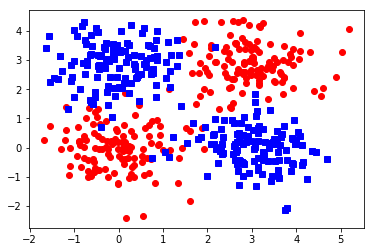

In [5]:
pl.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'ro'  )
pl.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 'bs'  )
pl.show()

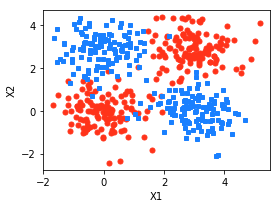

In [6]:
## Re-doing the previous plot, but with more details
pl.figure( figsize=(4,3) )
pl.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'o',
           markersize=5, color=(1.,0.2,0.1))
pl.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 's',
           markersize=4, color=(0.1,0.5,1.0))

pl.xlabel('X1')
pl.ylabel('X2')
pl.tight_layout()
pl.savefig('SyntheticDataset.png', dpi=500)
pl.show()

Let's start creating our Decision Tree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Variable _clf_ will contain all information learned by the classifier. To perform the learning step, we use the method _fit_:

In [8]:
clf.fit( features, labels )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

To find the accuracy of this classifier, we can use the method _score_.

In [9]:
clf.score( features, labels )

1.0

That means that our classifier was able to perfectly reproduce all points.

In [10]:
from sklearn.tree import export_graphviz
? export_graphviz()

In [11]:
export_graphviz( clf, 'Graph_DecisionTree_testdataset.dat' )

Feature ranking by Gini Importance

In [12]:
clf.feature_importances_

array([ 0.63343888,  0.36656112])

Looking at the plot, we know that the point $P_1 = [-1,-1]$ should be of class 0 (zero), and the point $P_2 = [-1,4]$ should belong to class 1. Let's Check the classifier's prediction:

In [13]:
P1 = np.array([[-1,-1]])
P2 = np.array([[-1,4]])

print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [ 0.]
Prediction for P2:  [ 1.]


**Question:** Why did we use [[ and ]] in the previous cell?

You can also check the probability that a given point belongs to a class:

In [14]:
print("Probability for P1: ", clf.predict_proba(P1))
print("Probability for P2: ", clf.predict_proba(P2))

Probability for P1:  [[ 1.  0.]]
Probability for P2:  [[ 0.  1.]]


Next, let's investigate the "decision boundaries" -- i.e. the boundary between classes

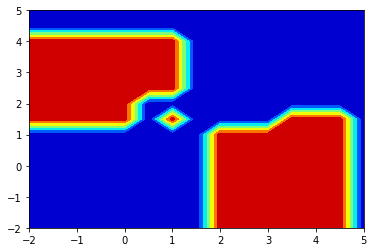

In [15]:
from matplotlib import mlab, cm

delta = 0.5
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

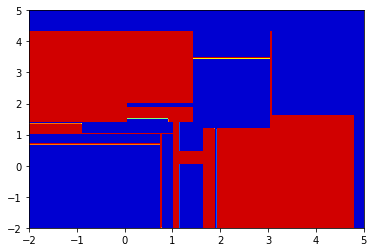

In [16]:
from matplotlib import mlab, cm

delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

Let's use some of the meta-parameters available in SK-learn to modify the learning process.

In [17]:
clf = DecisionTreeClassifier( max_depth = 5 )
clf.fit( features, labels )
print( clf.score( features, labels ) )
export_graphviz( clf, 'Graph_DecisionTree_testdataset_2.dat' )

0.966


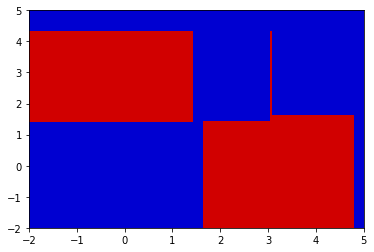

In [18]:
from matplotlib import mlab, cm

delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

## Wisconsing Breast Cancer dataset

As an exercise, let's try and reproduce the same analysis in the same dataset we explored yesterday!

In [19]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

print("Num samples x Num Features: ", bcancer.data.shape)
print("Num samples x Num Features: ", bcancer.target.shape)

Num samples x Num Features:  (569, 30)
Num samples x Num Features:  (569,)


In [20]:
clf = DecisionTreeClassifier()
clf.fit( bcancer.data, bcancer.target )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
clf.score( bcancer.data, bcancer.target )

1.0

In [22]:
export_graphviz( clf, 'Graph_DecisionTree_WBCdataset_2.dat' )

In [23]:
clf.feature_importances_

array([ 0.        ,  0.0368461 ,  0.00563858,  0.        ,  0.00701689,
        0.00583135,  0.        ,  0.00877112,  0.        ,  0.        ,
        0.        ,  0.        ,  0.007316  ,  0.00204521,  0.00744793,
        0.        ,  0.03184137,  0.        ,  0.        ,  0.        ,
        0.69559352,  0.05735376,  0.        ,  0.0110859 ,  0.00738798,
        0.        ,  0.00183582,  0.11398847,  0.        ,  0.        ])

# Random forests

Random forests are among the most important models in Machine Learning, especially for applications that demand low latency.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf = RandomForestClassifier( n_estimators = 20, oob_score = True )
clf.fit( features, labels )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [26]:
clf.score(features, labels)

0.998

In [27]:
clf.feature_importances_

array([ 0.46956551,  0.53043449])

In [28]:
print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [ 0.]
Prediction for P2:  [ 1.]


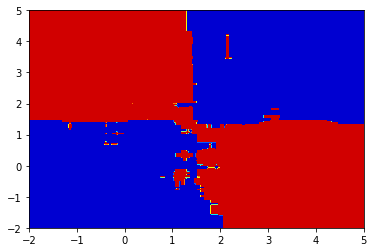

In [29]:
from matplotlib import mlab, cm

delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.show()

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, clf.predict(features))

0.998

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(labels, clf.predict(features)))
print("Recall: ", recall_score(labels, clf.predict(features)))
print("F1-score: ", f1_score(labels, clf.predict(features)))

Precision:  1.0
Recall:  0.996
F1-score:  0.997995991984


## AdaBoost

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
clf = GradientBoostingClassifier(learning_rate=1.5, n_estimators=100)
clf.fit( features, labels )
clf.score(features, labels)

1.0

In [34]:
clf.feature_importances_

array([ 0.13057705,  0.13942295])

In [35]:
print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [ 0.]
Prediction for P2:  [ 1.]


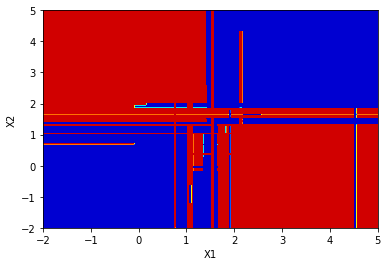

In [36]:
from matplotlib import mlab, cm

delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
pl.xlim(-2, 5)
pl.ylim(-2, 5)

pl.xlabel('X1')
pl.ylabel('X2')

pl.show()

# Support Vector Machines

Support Vector Machines (or SVMs) were for a long time the most widely used model in the Machine Learning community.

In [37]:
from sklearn.svm import SVC

In [38]:
clf = SVC()
clf.fit( features, labels )
print( clf.score( features, labels ) )

0.96


In [39]:
def plotContours(clf, figname, delta = 0.05):
    delta = 0.01
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    cset1 = pl.contourf( X, Y, Z, cmap=pl.get_cmap('jet'))
    pl.xlim(-2, 5)
    pl.ylim(-2, 5)

    pl.xlabel('X1')
    pl.ylabel('X2')

    pl.tight_layout()
    pl.savefig(figname, dpi=500)
    pl.show()
    
    return

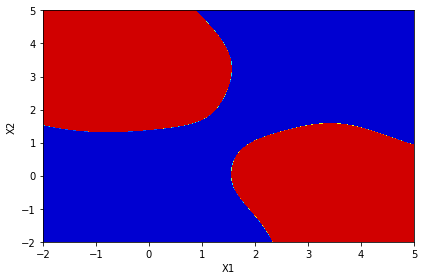

In [40]:
plotContours(clf, 'SVC_decisionboundary1.png')

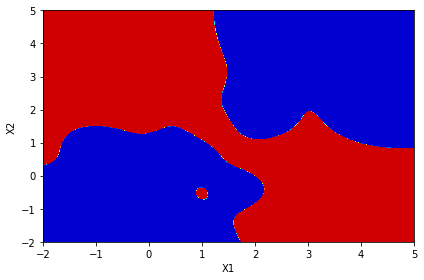

In [41]:
clf = SVC( C = 1000 )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundary_C1000.png')

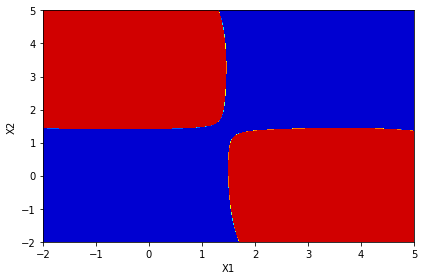

In [42]:
clf = SVC( C = 0.001 )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC001.png')

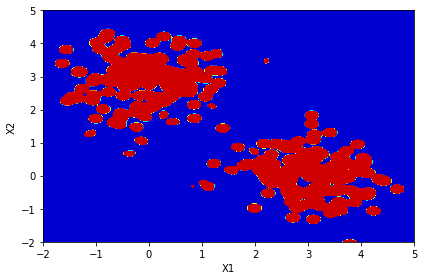

In [43]:
clf = SVC( C = 0.001, gamma = 100. )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC001g100.png')

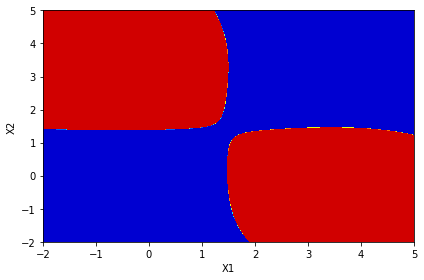

In [44]:
clf = SVC( C = 0.001, gamma = 1. )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC001g1.png')

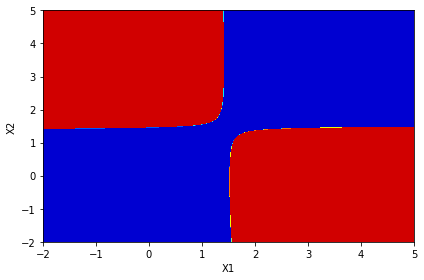

In [45]:
clf = SVC( C = 0.001, gamma = 0.1 )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC001g01.png')

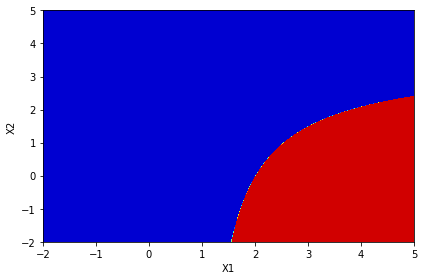

In [46]:
clf = SVC( C = 0.001, gamma = 0.001 )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundary1.png')

In [47]:
clf = SVC( C = 0.001, gamma = 0.1 )
clf.fit( features, labels )

print("Accuracy: ", accuracy_score(labels, clf.predict(features)))
print("Precision: ", precision_score(labels, clf.predict(features)))
print("Recall: ", recall_score(labels, clf.predict(features)))
print("F1-score: ", f1_score(labels, clf.predict(features)))

Accuracy:  0.96
Precision:  0.963709677419
Recall:  0.956
F1-score:  0.95983935743


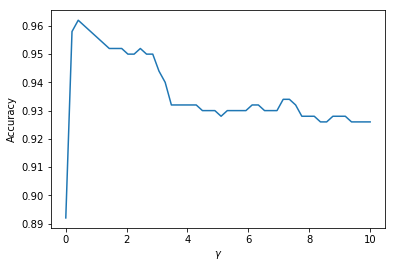

In [48]:
setGammas = np.linspace(0.005,10.0,50)

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 0.001, gamma = gamma )
    accuracies.append( clf.fit( features, labels ).score(features, labels) )

pl.plot(setGammas, accuracies)

pl.ylabel(r'Accuracy')
pl.xlabel(r'$\gamma$')
pl.savefig('SVM_accuracyvsgamma.png', dpi=500)
pl.show()

## Banana dataset

In [49]:
bdataset = np.loadtxt('banana_dataset.csv', delimiter=',')
print("Shape of the bdataset: ", bdataset.shape )

Shape of the bdataset:  (300, 3)


In [50]:
bfeat = bdataset[:,1:]
blabl = bdataset[:,0]

In [51]:
clf = SVC( C = 0.001, gamma = gamma )
clf.fit( bfeat, blabl )
clf.score(bfeat, blabl)

0.53000000000000003

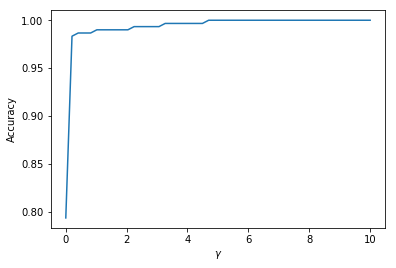

In [52]:
setGammas = np.linspace(0.005,10.0,50)

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 10., gamma = gamma )
    accuracies.append( clf.fit( bfeat, blabl ).score(bfeat, blabl) )

pl.plot(setGammas, accuracies)

pl.ylabel(r'Accuracy')
pl.xlabel(r'$\gamma$')
pl.savefig('SVM_accuracyvsgamma.png', dpi=500)
pl.show()

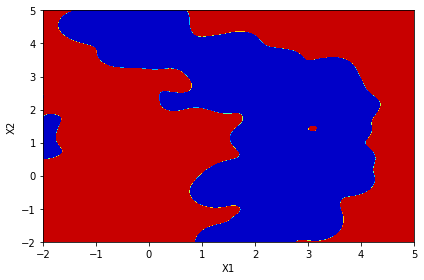

In [53]:
clf = SVC( C = 10., gamma = 10 )
clf.fit( bfeat, blabl )
plotContours(clf, 'SVC_decbound_bdataset1.png')

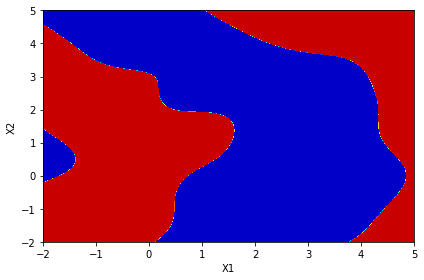

In [54]:
clf = SVC( C = 10., gamma = 1 )
clf.fit( bfeat, blabl )
plotContours(clf, 'SVC_decbound_bdataset2.png')

# Train-Test split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( bfeat, blabl, test_size=0.33)

In [56]:
print("Shape of the train dataset: ", X_train.shape)
print("Shape of the test dataset: ", X_test.shape)

Shape of the train dataset:  (201, 2)
Shape of the test dataset:  (99, 2)


In [57]:
clf = SVC( C = 0.001, gamma = 10. )
clf.fit( X_train, Y_train )
clf.score(X_test, Y_test)

0.48484848484848486

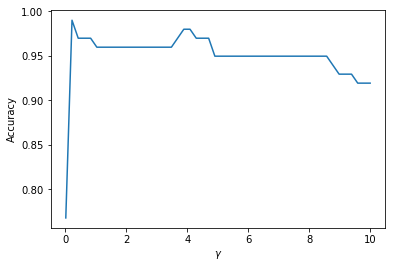

In [58]:
setGammas = np.linspace(0.01,10.0,50)

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 10., gamma = gamma )
    accuracies.append( clf.fit( X_train, Y_train ).score(X_test, Y_test) )

pl.plot(setGammas, accuracies)

pl.ylabel(r'Accuracy')
pl.xlabel(r'$\gamma$')
pl.savefig('SVM_accuracyvsgamma_bdataset.png', dpi=500)
pl.show()

Estimating the accuracy

In [59]:
numRepetitions = 100
accuracies = np.zeros( numRepetitions )

for j in range(numRepetitions):
    X_train, X_test, Y_train, Y_test = train_test_split( bfeat, blabl, test_size=0.33)
    clf = SVC( C = 10., gamma = 10. )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_test, Y_test)

print(r"Average accuracy (gamma = 10): ", accuracies.mean() )


for j in range(numRepetitions):
    X_train, X_test, Y_train, Y_test = train_test_split( bfeat, blabl, test_size=0.33)
    clf = SVC( C = 10., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_test, Y_test)

print("Average accuracy (gamma = 0.5): ", accuracies.mean() )

Average accuracy (gamma = 10):  0.930202020202
Average accuracy (gamma = 0.5):  0.970707070707


# K-fold cross validation

In [60]:
from sklearn.model_selection import KFold

In [61]:
kf = KFold(n_splits=4)

for train_index, test_index in kf.split(bfeat):
    X_train = bfeat[train_index]
    X_test  = bfeat[test_index]
    Y_train = blabl[train_index]
    Y_test  = blabl[test_index]
    
    clf = SVC( C = 10., gamma = 10. )
    clf.fit( X_train, Y_train )
    print( clf.score(X_test, Y_test) )

0.893333333333
0.986666666667
0.933333333333
0.96


In [62]:
kf = KFold(n_splits=4)

for train_index, test_index in kf.split(bfeat):
    X_train = bfeat[train_index]
    X_test  = bfeat[test_index]
    Y_train = blabl[train_index]
    Y_test  = blabl[test_index]
    
    clf = SVC( C = 10., gamma = 1. )
    clf.fit( X_train, Y_train )
    print( clf.score(X_test, Y_test) )

0.906666666667
1.0
0.96
0.973333333333
